In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

These are the types of the each columns variables, Here, Date,type, and region is in object.  year is in integer and other columns are in float.

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing values present in the dataset. String data need to be encoded. It is identified as classification problem to find the region and in another angle to find average price it can be consider as regression.

In [6]:
df['region'].unique()        

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Its gives the unique value of the dependent variable region

In [7]:
print(df['region'].value_counts())

Northeast              338
Orlando                338
BuffaloRochester       338
RaleighGreensboro      338
GrandRapids            338
RichmondNorfolk        338
SouthCentral           338
Albany                 338
Southeast              338
SouthCarolina          338
NorthernNewEngland     338
Atlanta                338
BaltimoreWashington    338
Tampa                  338
HarrisburgScranton     338
Louisville             338
Syracuse               338
StLouis                338
Plains                 338
Pittsburgh             338
LosAngeles             338
West                   338
Columbus               338
Spokane                338
NewYork                338
Boise                  338
Houston                338
Roanoke                338
California             338
Seattle                338
Denver                 338
CincinnatiDayton       338
Nashville              338
MiamiFtLauderdale      338
Portland               338
NewOrleansMobile       338
Charlotte              338
G

Here all the frequencies are equally distributed for each classes.  No imbalance found.

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


These are the statstical expressions for the variables

# EDA

Univariate analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

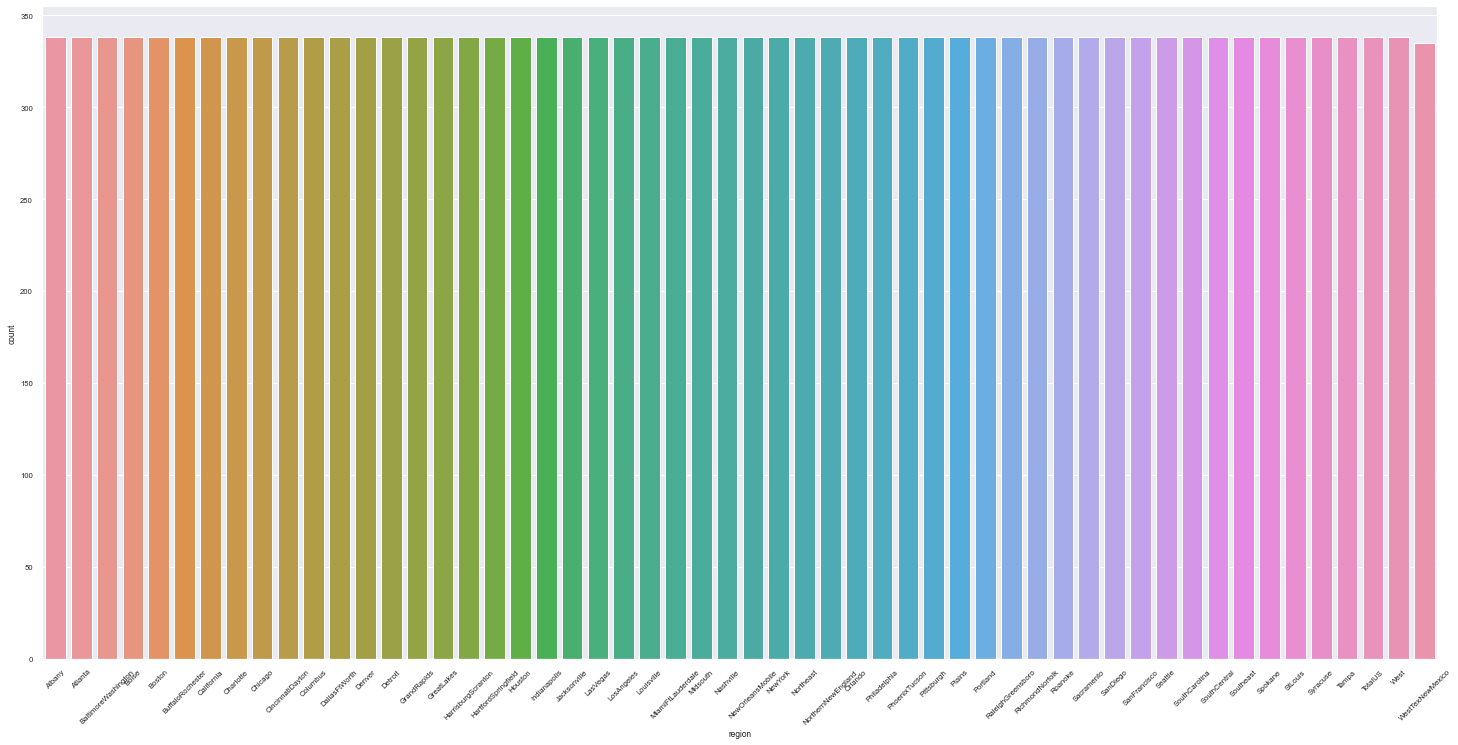

In [9]:
sn.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sn.countplot(x='region', data=df)
plt.xticks(rotation=45)

All  regions are equally distributed so there is no imbalance isssue exists.

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it.  So its removed.

In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
df[['Date','Month','Year']] = df['Date'].str.split("-",expand = True)

In [13]:
df[['Year','Month','Date']] = df[['Date','Month','Year']].astype(int)

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2015


 converting objects into integer datatype

In [15]:
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

There are for value counts for year

In [16]:
df['type'].nunique()

2

There are two types

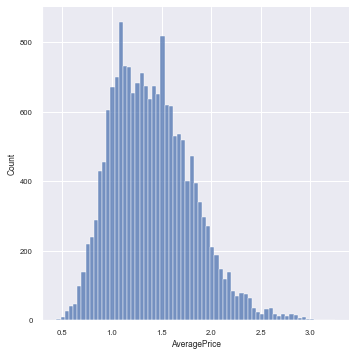

In [17]:
sn.displot(df["AveragePrice"])

Its normaly distributed.

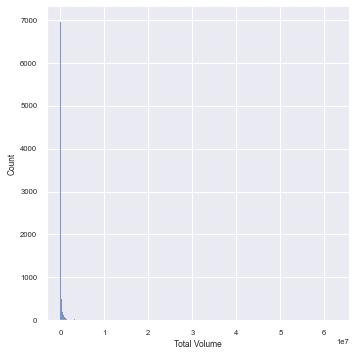

In [18]:
sn.displot(df["Total Volume"])

not normaly distributed

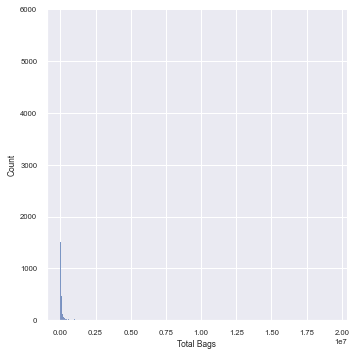

In [19]:
sn.displot(df["Total Bags"])

not normaly distributed

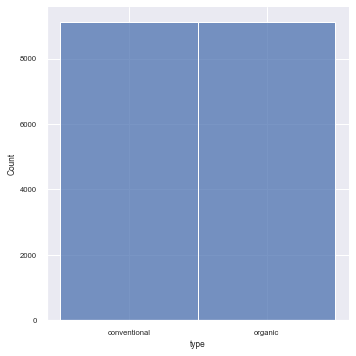

In [20]:
sn.displot(df["type"])

normaly distributed

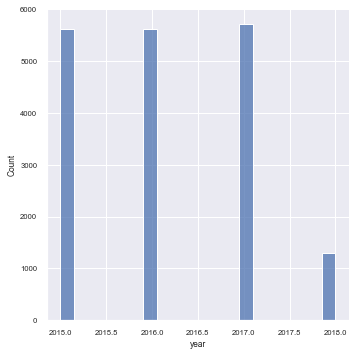

In [21]:
sn.displot(df["year"])

right skewed

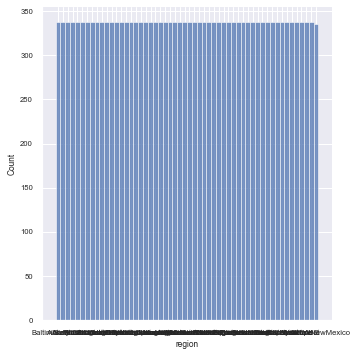

In [22]:
sn.displot(df["region"])

From these plots we came to know that some columns are not normaly distributed.

# Bivariate Analysis

<AxesSubplot:title={'center':'comparison between AveragePrice and region'}, xlabel='AveragePrice', ylabel='region'>

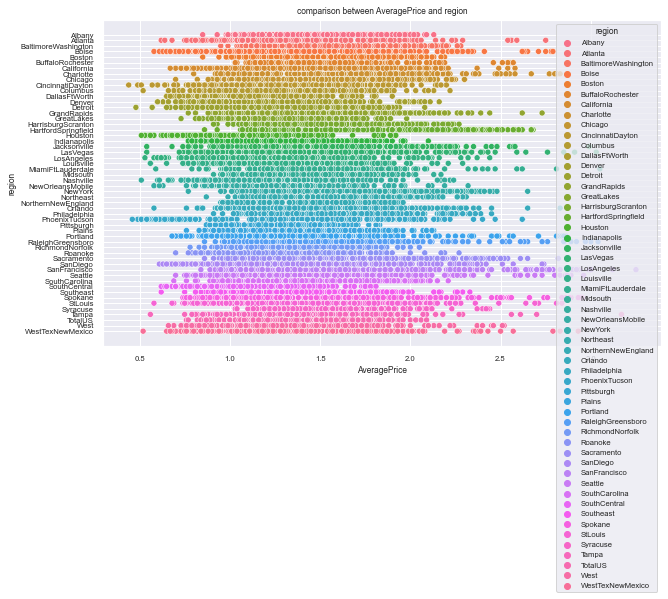

In [23]:
plt.figure(figsize=[10,6])
plt.title("comparison between AveragePrice and region")
sn.scatterplot(df['AveragePrice'],df['region'],hue=df["region"])

It gives the scatterplot of average price against each regions

<AxesSubplot:title={'center':'comparison between Total Volume and region'}, xlabel='Total Volume', ylabel='region'>

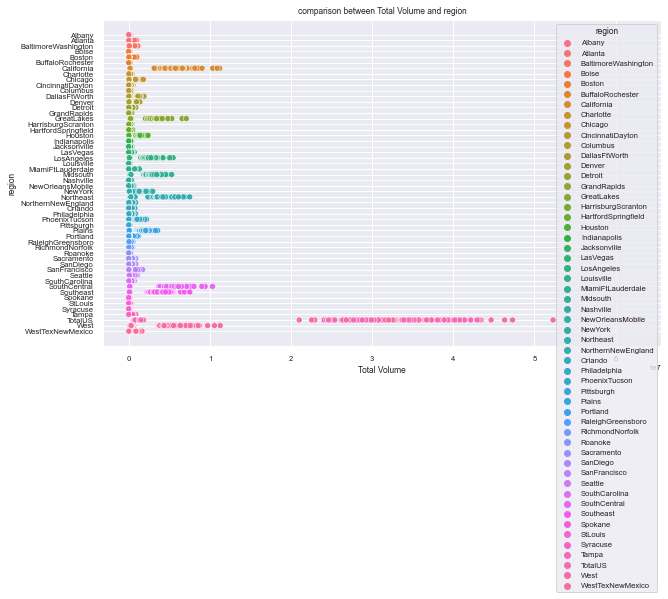

In [24]:
plt.figure(figsize=[10,6])
plt.title("comparison between Total Volume and region")
sn.scatterplot(df['Total Volume'],df['region'],hue=df["region"])

It gives the scatterplot of volume against each regions

<AxesSubplot:title={'center':'comparison between type and region'}, xlabel='type', ylabel='region'>

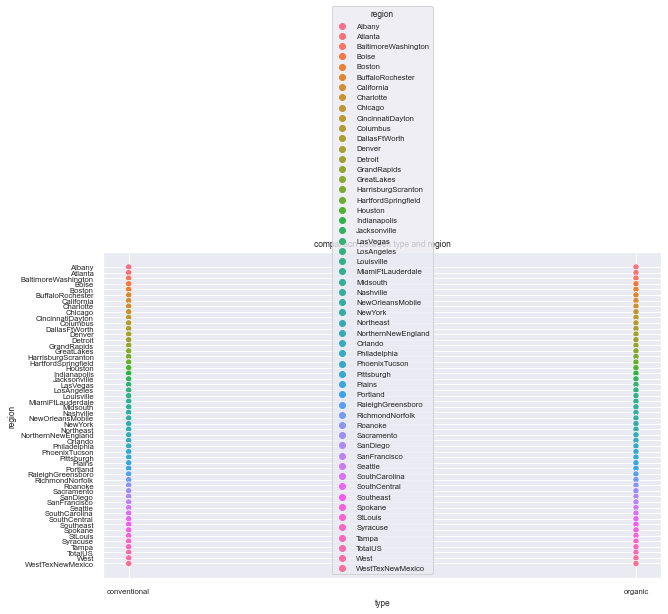

In [25]:
plt.figure(figsize=[10,6])
plt.title("comparison between type and region")
sn.scatterplot(df['type'],df['region'],hue=df["region"])

It gives the scatterplot of type against each regions

<AxesSubplot:title={'center':'comparison between Total Volume and Average Price'}, xlabel='Total Volume', ylabel='AveragePrice'>

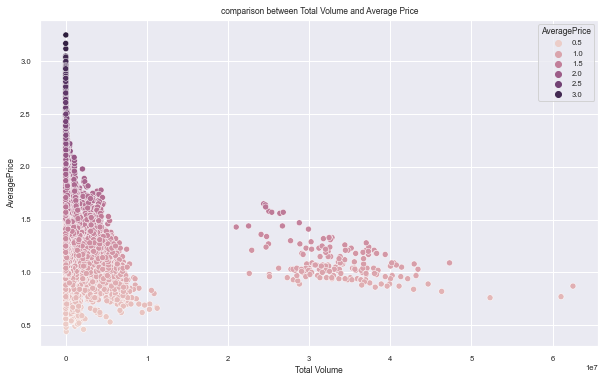

In [26]:
plt.figure(figsize=[10,6])
plt.title("comparison between Total Volume and Average Price")
sn.scatterplot(df['Total Volume'],df['AveragePrice'],hue=df["AveragePrice"])

It gives the scatterplot of total volume against AveragePrice

<AxesSubplot:title={'center':'comparison between type and Average Price'}, xlabel='type', ylabel='AveragePrice'>

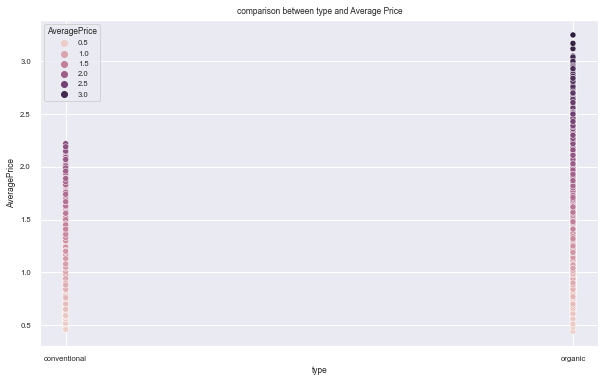

In [27]:
plt.figure(figsize=[10,6])
plt.title("comparison between type and Average Price")
sn.scatterplot(df['type'],df['AveragePrice'],hue=df["AveragePrice"])

It gives the scatterplot of type against AveragePrice

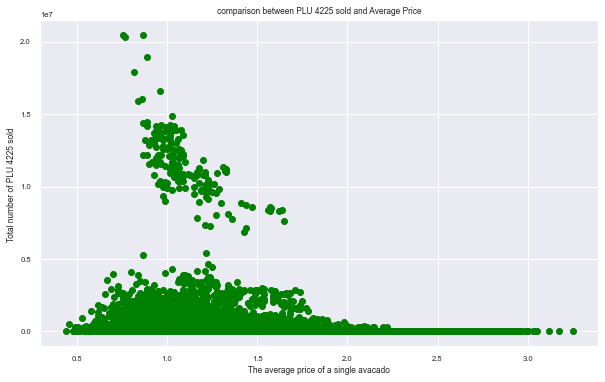

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['AveragePrice'],df['4225'],c='Green')
plt.xlabel('The average price of a single avacado')
plt.ylabel('Total number of PLU 4225 sold ')
plt.title("comparison between PLU 4225 sold and Average Price")
plt.show()

Here we also see maximum average price as 1

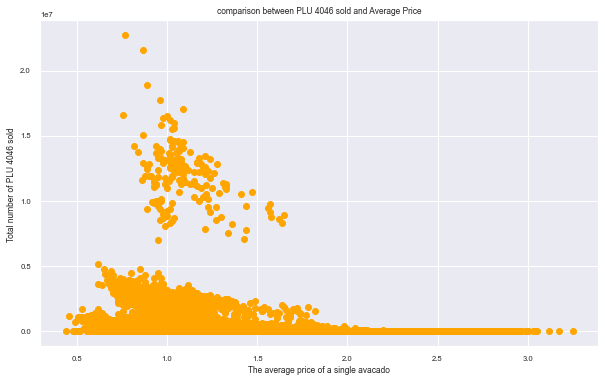

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df['AveragePrice'],df['4046'],c='Orange')
plt.xlabel('The average price of a single avacado')
plt.ylabel('Total number of PLU 4046 sold ')
plt.title("comparison between PLU 4046 sold and Average Price")
plt.show()

Here we can see 4046 sold against average price sold

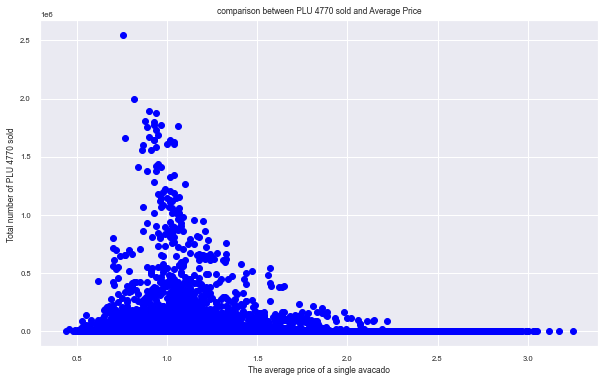

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['AveragePrice'],df['4770'],c='Blue')
plt.xlabel('The average price of a single avacado')
plt.ylabel('Total number of PLU 4770 sold ')
plt.title("comparison between PLU 4770 sold and Average Price")
plt.show()

Here we can see 4770 sold against average price sold

In [31]:
cor=df.corr()
cor

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Year
Date,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.003870,-0.008352,0.000319,0.004475,0.010621,0.004475
AveragePrice,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.093197
Total Volume,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,0.017193
4046,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,0.003353
4225,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.009559
4770,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.036531
Total Bags,-0.004988,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,0.071552
Small Bags,-0.003870,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,0.063915
Large Bags,-0.008352,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,0.087891
XLarge Bags,0.000319,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.081033


These are the correlations between the variables

<AxesSubplot:>

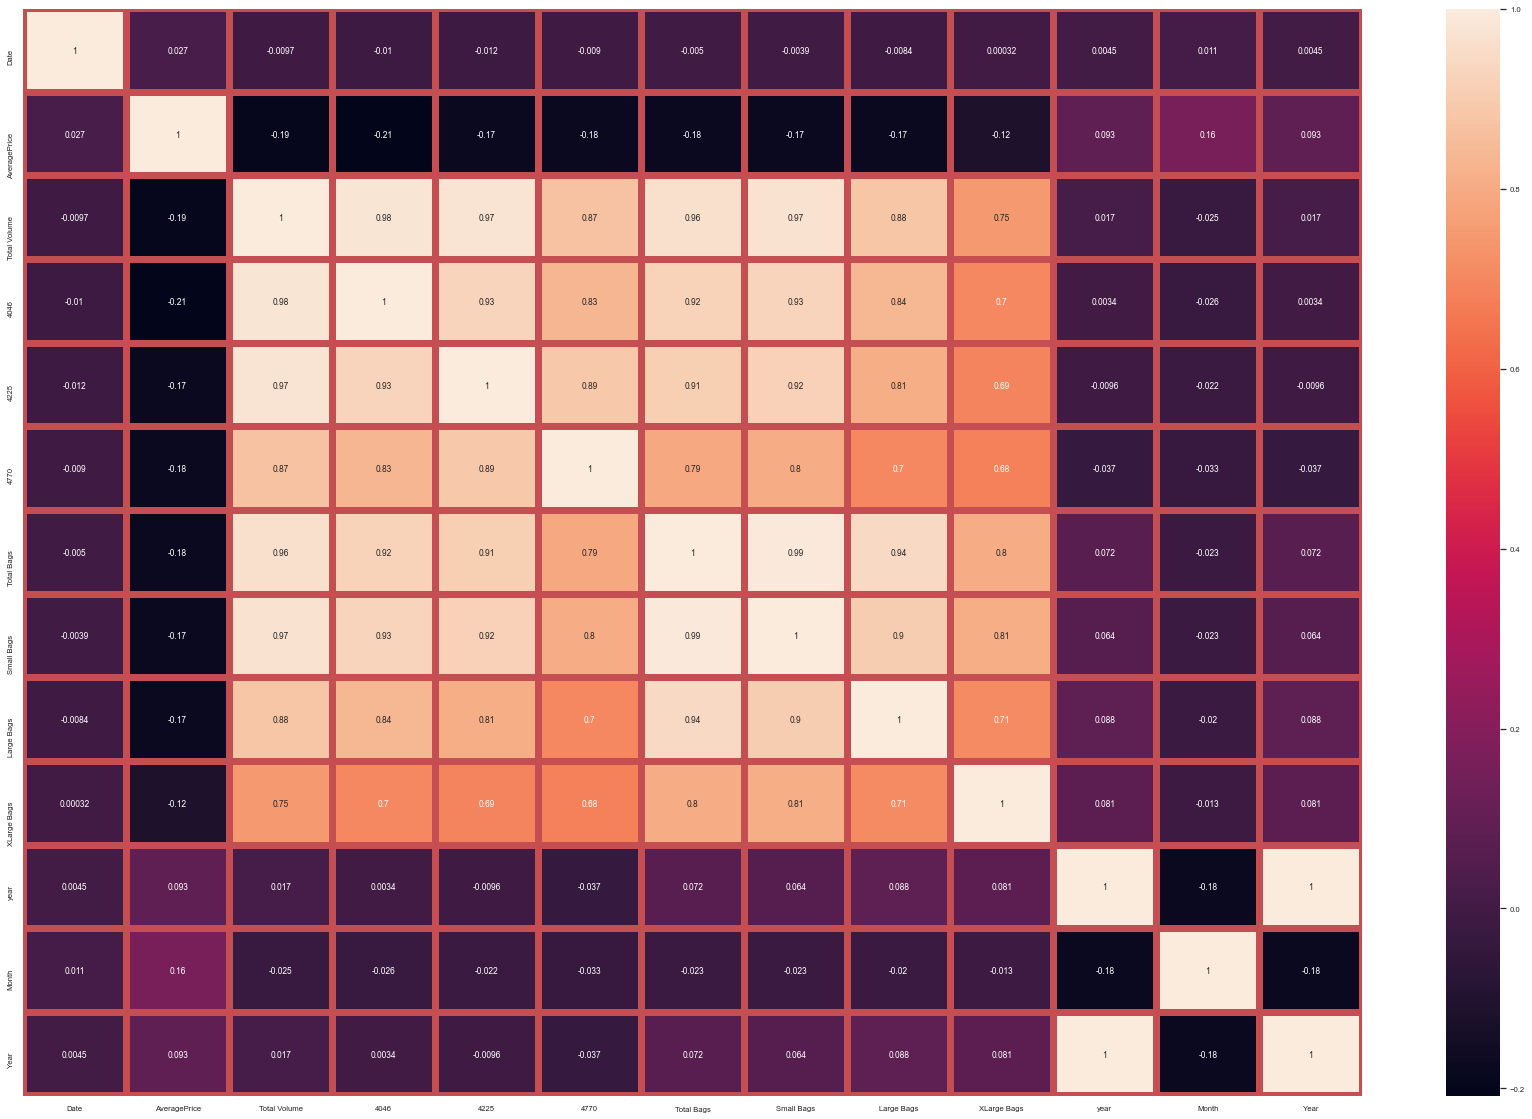

In [32]:
plt.figure(figsize=[30,20])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

Here cant see any column fairely correlated with Average price
 Some of them are negatively correlated with data
    columns
        - 4046 - Total number of avocados with PLU 4046 sold
        - 4225 - Total number of avocados with PLU 4225 sold
        - 4770 - Total number of avocados with PLU 4770 sold
        - Total Volume - Total number of avacados sold

 are highly correlated with each other, that could be possible because they all are sold information.

In [33]:
df.drop(['XLarge Bags','Small Bags','Total Bags','Large Bags'], axis=1, inplace=True)

In [34]:
df.shape

(18249, 11)

So after dropping all the unnecessary column 18249 rows and only 9 columns in dataset

In [35]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,year,Month,Year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899,6.177215,2016.147899
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938,3.534130,0.939938
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000,2015.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000,3.000000,2015.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000,6.000000,2016.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000,9.000000,2017.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000,12.000000,2018.000000


These are the statistical values

In [36]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])

used LabelEncoder for converting categorical to numerical

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

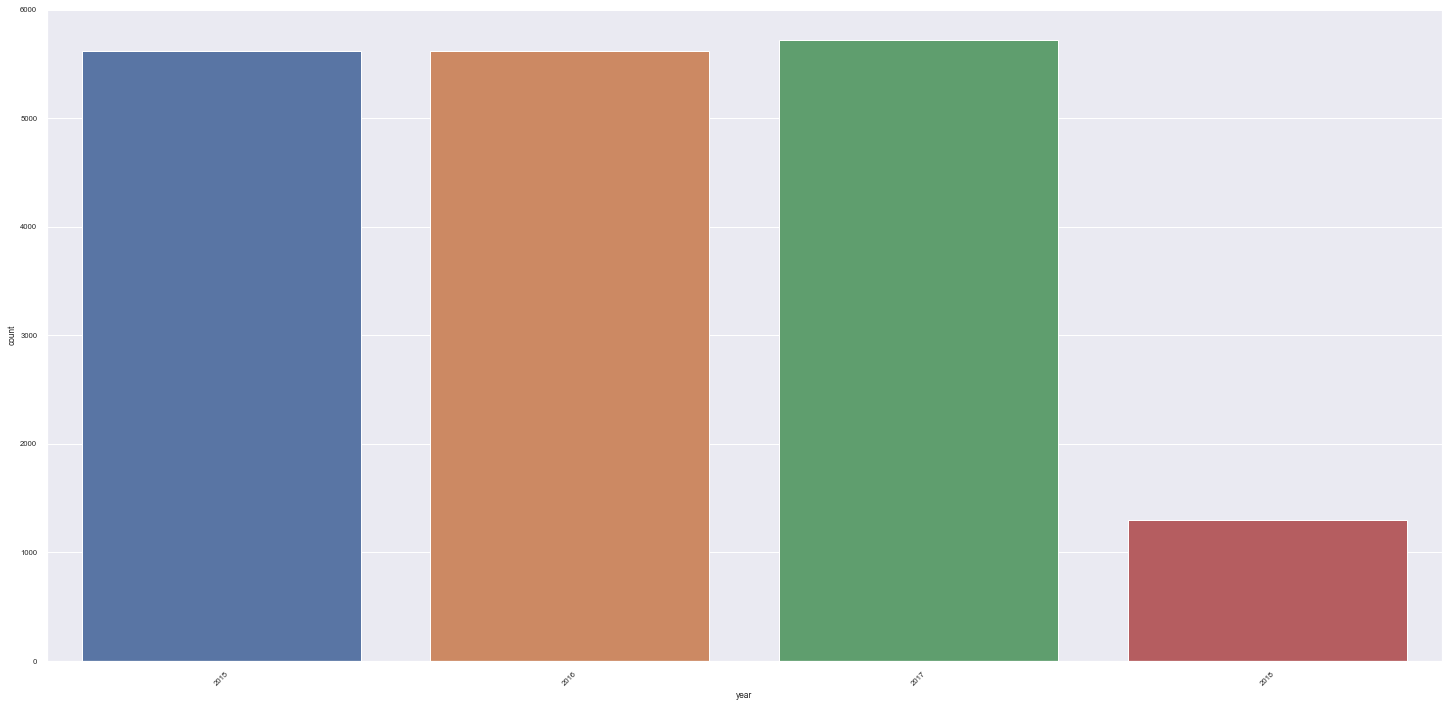

In [37]:
sn.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sn.countplot(x='year', data=df)
plt.xticks(rotation=45)

Three years is distrbuted equaly except 2015

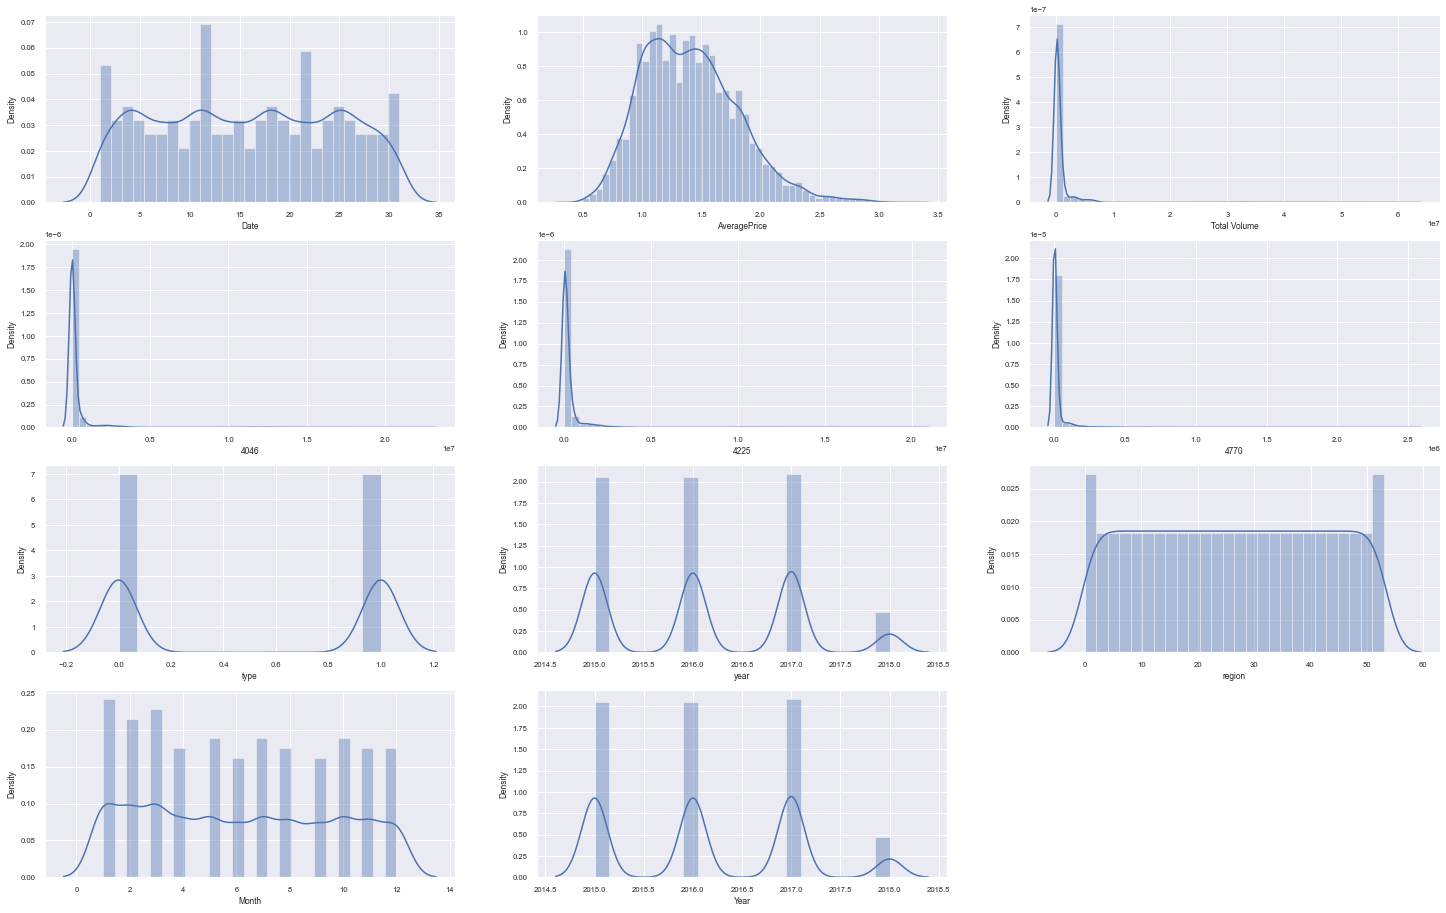

In [38]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(5,3,i[0]+1)
    sn.distplot(df[i[1]],color='b')

These are the displot of each columns

Date               AxesSubplot(0.125,0.749828;0.0731132x0.130172)
AveragePrice    AxesSubplot(0.212736,0.749828;0.0731132x0.130172)
Total Volume    AxesSubplot(0.300472,0.749828;0.0731132x0.130172)
4046            AxesSubplot(0.388208,0.749828;0.0731132x0.130172)
4225            AxesSubplot(0.475943,0.749828;0.0731132x0.130172)
4770            AxesSubplot(0.563679,0.749828;0.0731132x0.130172)
type            AxesSubplot(0.651415,0.749828;0.0731132x0.130172)
year            AxesSubplot(0.739151,0.749828;0.0731132x0.130172)
region          AxesSubplot(0.826887,0.749828;0.0731132x0.130172)
Month              AxesSubplot(0.125,0.593621;0.0731132x0.130172)
Year            AxesSubplot(0.212736,0.593621;0.0731132x0.130172)
dtype: object

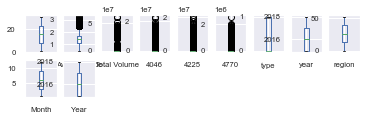

In [39]:
df.plot(kind="box",subplots=True,layout=(5,9))

From we came to know that there are outliers in some columns

# Outlier removing

In [40]:
from scipy.stats import zscore

In [41]:
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [42]:
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,0,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,0,2015,0,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,0,2015,0,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,0,2015,0,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,0,2015,0,11,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,1,2018,53,2,2018
18245,28,1.71,13888.04,1191.70,3431.50,0.00,1,2018,53,1,2018
18246,21,1.87,13766.76,1191.92,2452.79,727.94,1,2018,53,1,2018
18247,14,1.93,16205.22,1527.63,2981.04,727.01,1,2018,53,1,2018


In [43]:
new_df.shape

(17838, 11)

Because of outlier zscore removed some rows. now here 17838 rows and 11 columns

# Skewness

In [44]:
new_df.skew()

Date            0.012527
AveragePrice    0.385429
Total Volume    3.661159
4046            4.422120
4225            4.104196
4770            4.759495
type           -0.016371
year            0.221195
region          0.012062
Month           0.111748
Year            0.221195
dtype: float64

There are some skewness present in
columns 4046     -----    4.422120,
        4225     -----       4.104196,
        4770     -----       4.759495,

Data must be positive to reduce the skewness. So not able to remove the skewness by using boxcox

# Dividing Data into x and y

In [45]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [46]:
x.shape

(18249, 10)

In [47]:
y.shape

(18249,)

# Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Done the scaling for the data

# Splitting the Data for Training and Testing

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# Find the best random states use here

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=12)

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

linear regression fitting into x-train and y-train

In [54]:
lr.coef_

array([ 0.03088176, -0.69185883, -1.81968125,  2.43229419, -0.60037998,
        0.48415181,  0.08354971,  0.00306474,  0.23338547,  0.08354971])

Got the linear regression coefficient

In [55]:
lr.intercept_

0.9759864198400049

Got the linear regression constant

In [56]:
pred_test=lr.predict(x_test)

In [57]:
print("predicted value is",pred_test)
print("actual value is",y_test)

predicted value is [1.75400892 1.07035224 1.7580307  ... 1.1557459  1.77274905 1.11267522]
actual value is 13548    1.46
4623     1.22
12249    2.04
3255     1.11
13163    1.35
         ... 
1709     1.34
13357    1.55
3354     1.04
17562    2.39
4719     0.71
Name: AveragePrice, Length: 3650, dtype: float64


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("mean absoute value",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print ("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))


mean absoute value 0.23268450434743668
mean squared error 0.09088430686217495
Root mean squared error 0.3014702420839824


In [59]:
print(r2_score(y_test,pred_test))

0.44550047726838504


# SVR

In [60]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.4296175183634745


In [61]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.09160805886454172
MAE: 0.23179726845488577
r2_score: -0.4144919196548018


# SVR POLY

In [62]:
svr_p = SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.4791724088639433


In [63]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.09160805886454172
MAE: 0.23179726845488577
r2_score: -0.4144919196548018


# SVR rbf

In [64]:
svr_r = SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.5446998715932876


In [65]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.09160805886454172
MAE: 0.23179726845488577
r2_score: -0.4144919196548018


# RandomForest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
rf_pred=rf.predict(x_test)

0.9845716301966467


In [68]:
print('MSE:',mean_squared_error(rf_pred,y_test))
print('MAE:',mean_absolute_error(rf_pred,y_test))
print('r2_score:',r2_score(rf_pred,y_test))

MSE: 0.01764830899726027
MAE: 0.09329353424657534
r2_score: 0.864539752162808


# Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
dtr_pred=dtr.predict(x_test)

1.0


In [70]:
print('MSE:',mean_squared_error(dtr_pred,y_test))
print('MAE:',mean_absolute_error(dtr_pred,y_test))
print('r2_score:',r2_score(dtr_pred,y_test))

MSE: 0.0389894794520548
MAE: 0.12694794520547945
r2_score: 0.7549330986251348


# Gradient Booster Regressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbr_pred=gbr.predict(x_test)

0.7336035585222934


In [73]:
print('MSE:',mean_squared_error(gbr_pred,y_test))
print('MAE:',mean_absolute_error(gbr_pred,y_test))
print('r2_score:',r2_score(gbr_pred,y_test))

MSE: 0.04534754857885225
MAE: 0.1586538497558237
r2_score: 0.5167851338262777


# Regularization

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [75]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,1,10],
            'random_state':list(range(0,10)),
            'fit_intercept':[True,False],
            'selection':['cyclic', 'random']}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'random_state': 2, 'selection': 'random'}


These are the best parameters

In [76]:
ls = Lasso(alpha=0.0001,random_state=2,fit_intercept=True,selection ='random')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.4448889565138624

# cross validation

In [77]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.08055333882886684

In [79]:
from sklearn.model_selection import cross_val_score 
print(cross_val_score(dtr,x,y,cv=5).mean())

-0.2776539559692761


In [82]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.07649816634335174


In [85]:
print(cross_val_score(svr_r,x,y,cv=5).mean())

-0.03000764384888286


In [86]:
print(cross_val_score(svr_p,x,y,cv=5).mean())

-0.1776520699497934


In [84]:
print(cross_val_score(gbr,x,y,cv=5).mean())

0.3539826703302972


In [88]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.21003802986049808


# Ensemble technique

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[100],
            'criterion':['mse'],
            'min_samples_split':[2],
            'min_samples_leaf':[1]} 



In [90]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


These are the best parmeters

In [92]:
rf= RandomForestRegressor(criterion="mse",min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2_score",rfs*100)

rfs_score=cross_val_score(rf,x,y,cv=5)
rfc=rfs_score.mean()
print("Cross_val_score",rfc*100)


R2_score 89.35796695649614
Cross_val_score 20.43015861791996


R2 score has improved as 89% after tunning the model

# Saving the model

In [97]:
import joblib
joblib.dump(final_model,"Final Model of Avocado.pkl")

['Final Model of Avocado.pkl']

saved the model

# conclusion

In [99]:
loaded_model=joblib.load(open('Final Model of Avocado.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8916540160356499


In [100]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])

In [101]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
Predicted,1.4353,1.1423,1.9773,1.0804,1.4090,0.8017,1.5997,1.1345,1.0552,1.9040,...,0.9948,1.1206,1.5507,1.7274,1.7743,1.3962,1.4671,1.0274,2.1310,0.9026
Original,1.4497,1.1407,1.9823,1.0929,1.4304,0.7852,1.5808,1.1255,1.0473,1.8928,...,0.9978,1.1243,1.5089,1.7521,1.7617,1.3853,1.4769,1.0294,2.0881,0.8507


Got it as predicted and original values are same